<a href="https://colab.research.google.com/github/arsha009-cpu/23CSBTB29/blob/main/EXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Required Libraries

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

Loading Data

In [5]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

Loading Data

In [8]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)


In [7]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


Feature Selection

In [6]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

Splitting Data

In [9]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


Building Decision Tree Model

In [10]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

# Make sure your column names are not included as the first row of the data.
# if they are, skip the first row when assigning to X
# for example, if 'Pregnancies' is the header for the 'pregnant' column and it's in the first row
# you might need to do something like:
# X = pima[1:][feature_cols]

# Alternatively, explicitly set the header row when reading your data
# (assuming you're reading from a file like a CSV):
# pima = pd.read_csv('your_data_file.csv', header=0)  # 0 indicates the first row is the header

Evaluating the Model

In [11]:
# ipython-input-9-b477ece9cc03

#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
# The error was due to column headers being treated as data
# Assuming the first row contains headers, we skip it when assigning to X
X = pima[1:][feature_cols]  # Features, skip the first row
y = pima[1:].label # Target variable, skip the first row

# Alternatively, if you read your data using pandas, ensure you set the header correctly:
# pima = pd.read_csv('your_data_file.csv', header=0)  # 0 indicates the first row is the header


# ipython-input-11-b477ece9cc03

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # Or any other classifier you want to use
from sklearn import metrics

# Assuming you have already defined X and y as in your ipython-input-9-8937c08d392f

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create and train a model (using Logistic Regression as an example)
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Now you can evaluate the model's accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7835497835497836


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Visualizing Decision Trees

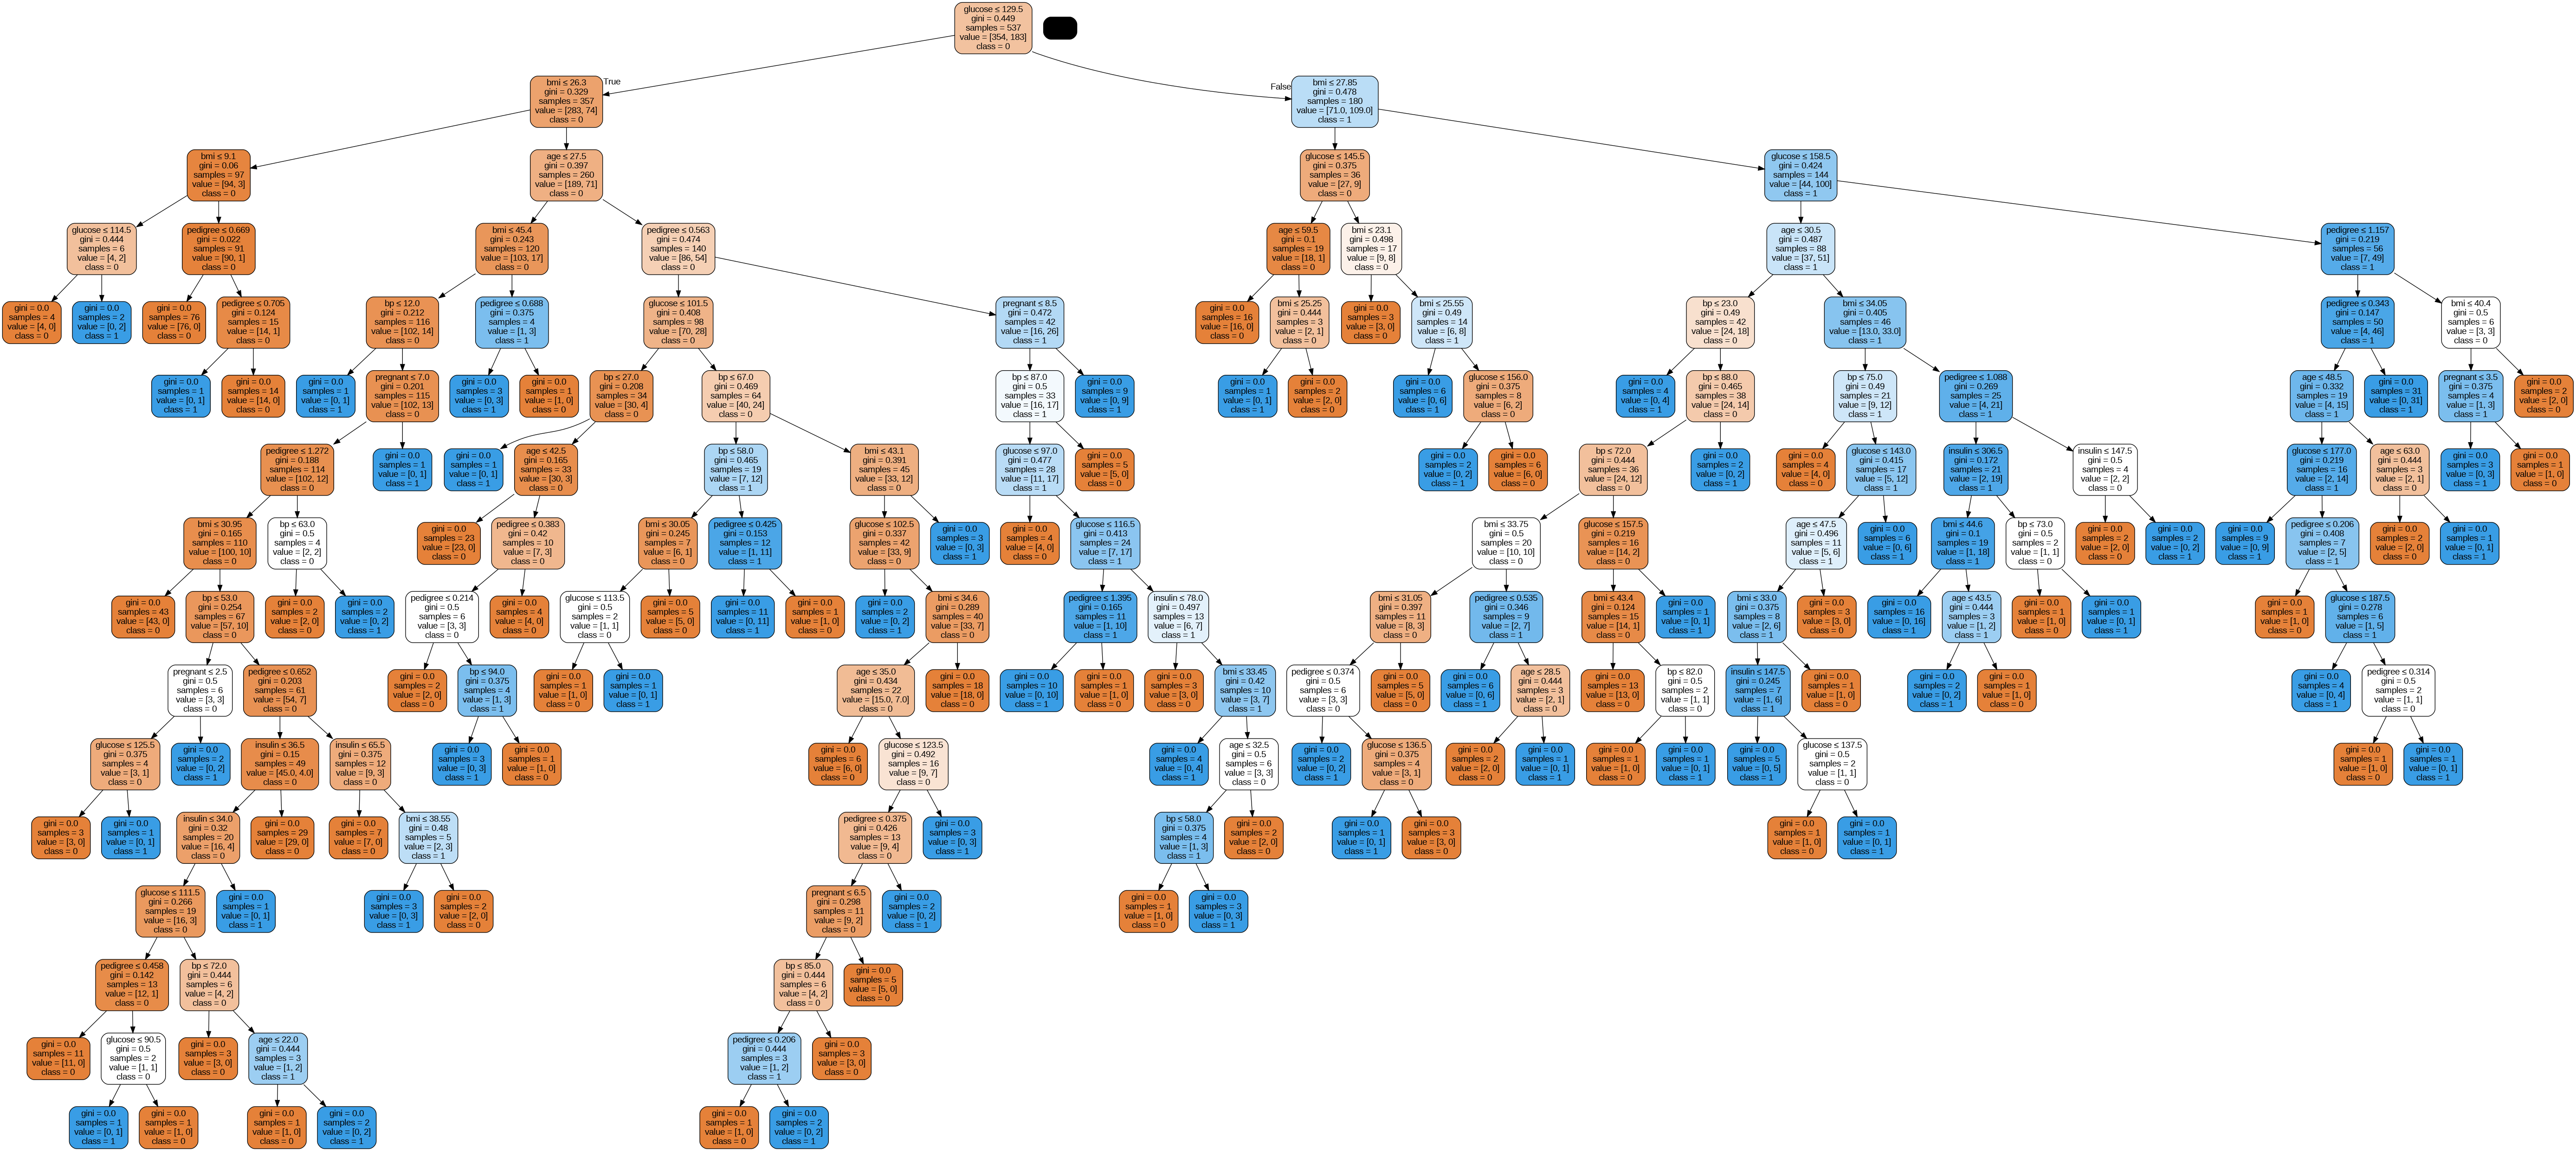

In [15]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier

# Assuming 'model' from your previous code is the Logistic Regression model,
# you need to create and train a DecisionTreeClassifier if you want to visualize a tree.

# Create and train a DecisionTreeClassifier
clf = DecisionTreeClassifier() # Assign the classifier to 'clf'
clf.fit(X_train, y_train)  # Train the classifier

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

Optimizing Decision Tree Performance

In [16]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7705627705627706



Visualizing Decision Trees

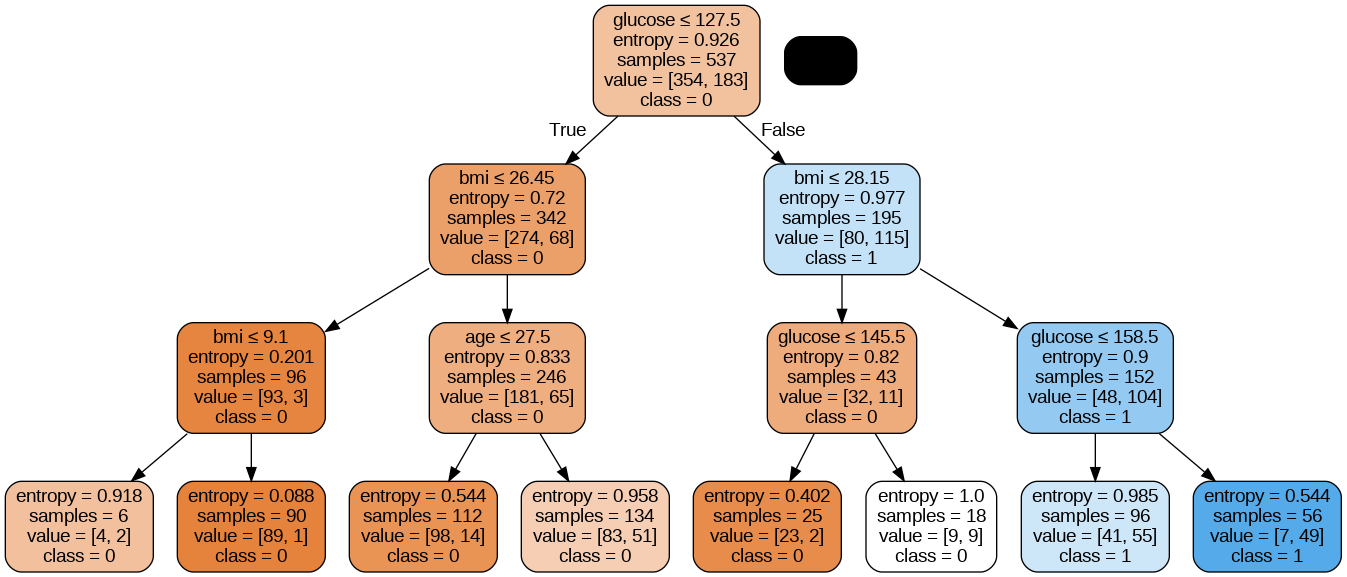

In [17]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())